In [1]:
import src.helper as hp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, r2_score, recall_score
from sklearn.model_selection import GridSearchCV

In [2]:
# Get data 
driver = hp.get_data('data/churn.csv')

In [3]:
driver['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [4]:
X, y = hp.data_clean('data/churn_train.csv')

In [6]:
# y = y.map({1:True, 0:False})

In [7]:
# X.drop(['last_trip_date', 'signup_date'],axis=1, inplace=True)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [9]:
def get_model_errors(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    return accuracy, precision, recall

In [10]:
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [11]:
y_pred = model.predict(X_test)

In [12]:
y_pred.mean()

0.5169

In [13]:
(y_pred==y_test).mean()

1.0

In [14]:
accuracy, precision, recall = get_model_errors(model, X_test, y_test)
print(accuracy, precision, recall)

1.0 1.0 1.0


In [ ]:
k = 10 # number of folds in the cross-validation 
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=k, n_jobs=-1) 
scores

In [17]:
X_train

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,is_iphone,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,last_trip_day,last_trip_month,signup_day,signup_month
16869,2.82,4.8,4.0,1.00,1,0.0,1,1,25.0,1,0,0,22,6,8,1
2403,2.89,5.0,4.8,1.05,0,20.0,0,0,50.0,1,0,0,12,5,19,1
25179,3.33,4.7,4.9,1.04,1,13.0,0,0,56.5,0,0,1,14,6,7,1
5714,1.66,5.0,0.0,1.00,1,0.0,0,0,0.0,0,0,1,11,5,22,1
18353,5.09,4.4,4.8,1.13,0,14.3,3,0,85.7,0,1,0,25,6,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34020,8.17,5.0,5.0,1.00,1,0.0,0,0,100.0,0,1,0,26,6,26,1
13168,2.73,4.7,3.7,1.00,0,0.0,1,0,66.7,0,0,1,17,5,10,1
11068,0.00,5.0,0.0,1.00,1,0.0,2,0,100.0,1,0,0,11,6,21,1
30101,5.10,4.8,5.0,1.00,0,0.0,5,0,78.3,0,1,0,28,6,13,1


In [18]:
model.feature_importances_

array([5.86418640e-03, 3.34500519e-02, 3.64280747e-03, 1.77778127e-02,
       3.37809094e-03, 2.63475101e-02, 2.06989598e-02, 2.98457641e-03,
       2.92510471e-02, 1.18669721e-03, 7.74865353e-03, 6.48396362e-04,
       2.22592307e-02, 8.20969680e-01, 3.79229956e-03, 0.00000000e+00])


13. Feature ranking:
1. avg_rating_by_driver (0.039628)
2. surge_pct (0.025253)
3. trips_in_first_30_days (0.020146)
4. weekday_pct (0.019961)
5. avg_surge (0.018457)
6. avg_dist (0.005838)
7. avg_rating_of_driver (0.003457)
8. luxury_car_user (0.002549)
9. is_iphone (0.002533)
10. city_Astapor (0.001096)


Text(0.5, 1.0, 'Feature Importances')

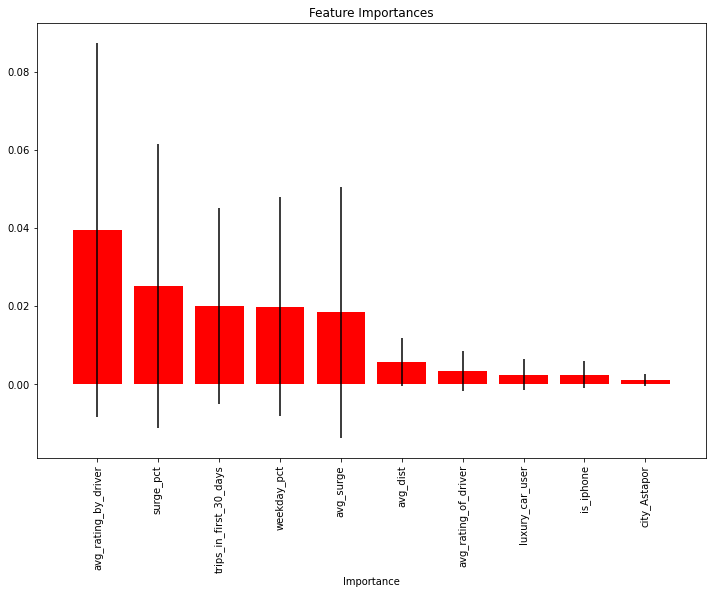

In [15]:
n = 10 # top 10 features

#importances = forest_fit.feature_importances_[:n]
importances = model.feature_importances_[:n]
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
features = list(X.columns[indices])

# Print the feature ranking
print("\n13. Feature ranking:")

for f in range(n):
    print("%d. %s (%f)" % (f + 1, features[f], importances[indices[f]]))

# Plot the feature importances of the forest
fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(range(10), importances[indices], yerr=std[indices], color="r", align="center")
ax.set_xticks(range(10))
ax.set_xticklabels(features, rotation = 90)
ax.set_xlim([-1, 10])
ax.set_xlabel("Importance")
ax.set_title("Feature Importances")